In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [83]:
df['smoker'] = (df['smoker'] == 'yes').astype(int)


In [85]:
df.drop(['sex'] , axis=1)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,southwest,16884.92400
1,18,33.770,1,0,southeast,1725.55230
2,28,33.000,3,0,southeast,4449.46200
3,33,22.705,0,0,northwest,21984.47061
4,32,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830
1334,18,31.920,0,0,northeast,2205.98080
1335,18,36.850,0,0,southeast,1629.83350
1336,21,25.800,0,0,southwest,2007.94500


In [86]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [87]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# dictionary = [['southwest' , 1] , ['southeast' , 2] , ['northwest' , 3] , ['northeast' , 4]]
# enc.fit(dictionary)
# # enc.transform(df['region'])

In [88]:
# # details about Encoder 
# enc.categories_
# enc.transform([['southwest', 1]]).toarray()

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['region'])
df['region'] = le.transform(df['region'])

In [90]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


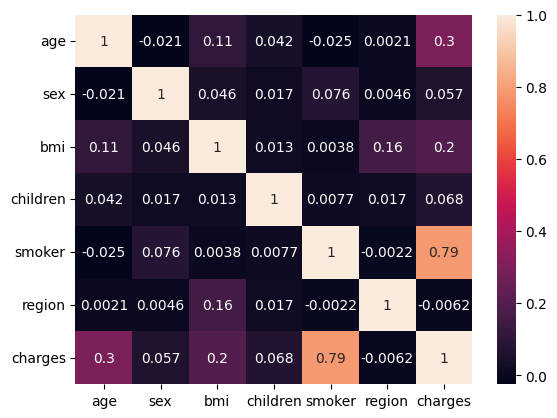

In [91]:
sns.heatmap(df.corr() , annot=True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

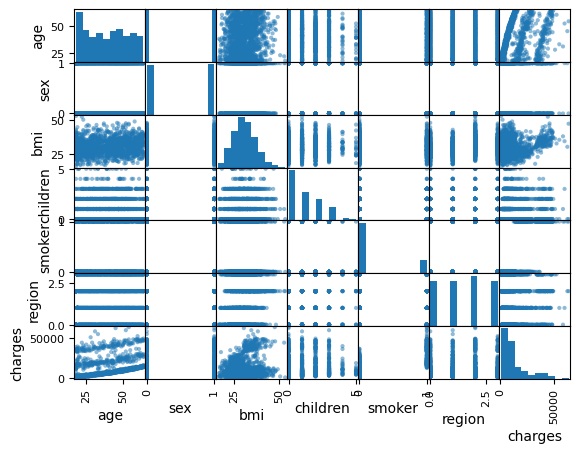

In [94]:
plt.figure(figsize=(20 , 20))
pd.plotting.scatter_matrix(df)
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(df.drop(['charges'] , axis=1) , df['charges'] , train_size=0.8) 

In [96]:
from sklearn.linear_model import LinearRegression
reg=  LinearRegression()
reg.fit(xtrain , ytrain)
reg.score(xtest , ytest)

0.740829942473856

In [98]:
from sklearn.ensemble import RandomForestRegressor
regr =  RandomForestRegressor(n_estimators=100)
regr.fit(xtrain , xtest)
regr.score(xtest,  ytest)

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(xtrain ,ytrain)
gb_reg.score(xtest , ytest)

0.8591700545884391

In [ ]:
# mean absolute error 
# mean squared error  

In [101]:
reg.coef_

array([  261.07038942,  -320.24924358,   334.86720214,   423.31062704,
       23890.45011619,  -270.06975942])

In [107]:
reg.feature_names_in_
regr.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

In [108]:
regr.feature_importances_

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'